In [2]:
import pandas as pd
import datetime

cta_ridership_df = pd.read_csv("CTA_-_Ridership_-__L__Station_Entries_-_Monthly_Day-Type_Averages___Totals.csv")
cta_ridership_df.head()


,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,01/01/2001,6233.9,3814.5,2408.6,164447
1,41190,Jarvis,01/01/2001,1489.1,1054.0,718.0,40567
2,40100,Morse,01/01/2001,4412.5,3064.5,2087.8,119772
3,41300,Loyola,01/01/2001,4664.5,3156.0,1952.8,125008
4,40760,Granville,01/01/2001,3109.8,2126.0,1453.8,84189


In [3]:
cta_ridership_df["month_beginning"] = pd.to_datetime(cta_ridership_df["month_beginning"])
cta_ridership_df.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,2001-01-01,6233.9,3814.5,2408.6,164447
1,41190,Jarvis,2001-01-01,1489.1,1054.0,718.0,40567
2,40100,Morse,2001-01-01,4412.5,3064.5,2087.8,119772
3,41300,Loyola,2001-01-01,4664.5,3156.0,1952.8,125008
4,40760,Granville,2001-01-01,3109.8,2126.0,1453.8,84189


In [4]:
x = datetime.datetime(2013, 1,1)
y= datetime.datetime(2023,12,1)


cta_ridership_df = cta_ridership_df.loc[(cta_ridership_df["month_beginning"]>=x) & (cta_ridership_df["month_beginning"]<=y),:]
cta_ridership_df.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
20414,40900,Howard,2013-01-01,6134.1,4252.0,2928.6,166602
20415,41190,Jarvis,2013-01-01,1295.2,1124.8,739.4,36690
20416,40100,Morse,2013-01-01,4443.5,3314.8,2462.6,123329
20417,41300,Loyola,2013-01-01,4641.5,3653.3,2459.0,129021
20418,40760,Granville,2013-01-01,3674.0,2830.8,1991.6,102108


In [5]:
cta_ridership_clean = cta_ridership_df.loc[(cta_ridership_df[["avg_weekday_rides", "avg_saturday_rides", "avg_sunday-holiday_rides"]] !=0).all(axis=1)]
counts = cta_ridership_clean["stationame"].value_counts()
#counts.to_csv('name.csv',index=True)


In [6]:
cta_line_names = pd.read_csv("name.csv")
cta_line_names = cta_line_names.loc[cta_line_names["count"] == 132,:]

cta_lines = cta_line_names["stationame"].to_list()
cta_lines

['Howard',
 'Central-Lake',
 'Cicero-Lake',
 'Pulaski-Lake',
 'Conservatory',
 'Kedzie-Lake',
 'California-Lake',
 'Ashland-Lake',
 'Morgan-Lake',
 'Clinton-Lake',
 '35-Bronzeville-IIT',
 'Indiana',
 '43rd',
 '47th-South Elevated',
 '51st',
 'Garfield-South Elevated',
 'Laramie',
 'Austin-Lake',
 'East 63rd-Cottage Grove',
 'Kedzie-Cermak',
 'Forest Park',
 'Polk',
 '18th',
 'Damen-Cermak',
 'Western-Cermak',
 'California-Cermak',
 'Central Park',
 'Ridgeland',
 'Pulaski-Cermak',
 'Kostner',
 'Cicero-Cermak',
 '54th/Cermak',
 'Harlem-Lake',
 'Oak Park-Lake',
 'King Drive',
 'Halsted/63rd',
 'Jarvis',
 'Halsted-Orange',
 'Midway Airport',
 'Pulaski-Orange',
 'Kedzie-Midway',
 'Western-Orange',
 '35th/Archer',
 'Ashland-Orange',
 'Washington/Wells',
 'Ashland/63rd',
 'Quincy/Wells',
 'LaSalle/Van Buren',
 'Library',
 'Adams/Wabash',
 'State/Lake',
 'Clark/Lake',
 'Merchandise Mart',
 'Chicago/Franklin',
 'Sedgwick',
 'Armitage',
 'Diversey',
 'Wellington',
 'Southport',
 'Paulina',
 'Add

In [13]:
cta_ridership_cleaned_df = cta_ridership_clean[cta_ridership_clean["stationame"].isin(cta_lines)]
cta_ridership_cleaned_df = cta_ridership_cleaned.rename(columns={'station_id': 'Station ID', 'stationame': 'Station Name', 'month_beginning':'Month', "avg_weekday_rides": "Average Weekday Rides", 'avg_saturday_rides': "Average Saturday Rides",
                                                              'avg_sunday-holiday_rides':'Average Sunday/Holiday Rides', 'monthtotal': 'Monthly Total'})
cta_ridership_cleaned_df.head()

,Station ID,Station Name,Month,Average Weekday Rides,Average Saturday Rides,Average Sunday/Holiday Rides,Monthly Total
20414,40900,Howard,2013-01-01,6134.1,4252.0,2928.6,166602
20415,41190,Jarvis,2013-01-01,1295.2,1124.8,739.4,36690
20416,40100,Morse,2013-01-01,4443.5,3314.8,2462.6,123329
20417,41300,Loyola,2013-01-01,4641.5,3653.3,2459.0,129021
20418,40760,Granville,2013-01-01,3674.0,2830.8,1991.6,102108


In [19]:
yearly_riders = cta_ridership_cleaned_df.groupby(cta_ridership_cleaned_df['Month'].dt.year)['Monthly Total'].sum()
yearly_riders.tolist()

[164461937,
 165252994,
 168765483,
 166968845,
 161205233,
 158063036,
 153166444,
 52082546,
 56206845,
 75293773,
 86561952]

In [17]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, "CTA Yearly 'L' Riders")

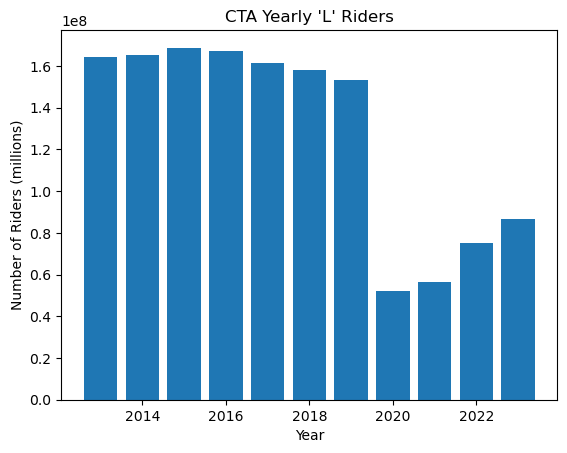

In [23]:
years = [2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
plt.bar(years, yearly_riders)
plt.xlabel("Year")
plt.ylabel("Number of Riders (millions)")
plt.title("CTA Yearly 'L' Riders")